# Introduction

In this notebook, we will do a comprehensive analysis of the Android app market by comparing thousands of apps in the Google Play store.

# About the Dataset of Google Play Store Apps & Reviews

**Data Source:** <br>
App and review data was scraped from the Google Play Store by Lavanya Gupta in 2018. Original files listed [here](
https://www.kaggle.com/lava18/google-play-store-apps).

# Import Statements

In [54]:
# NOTE: plotly would not disply any graphs until I installed node.js in the miniforge env, then I had to restart jupyter lab.
import pandas as pd
import plotly.express as px

# Notebook Presentation

In [55]:
# Show numeric output in decimal format e.g., 2.15
pd.options.display.float_format = '{:,.2f}'.format

# Read the Dataset

In [56]:
df_apps = pd.read_csv('apps.csv')

# Data Cleaning

**Challenge**: How many rows and columns does `df_apps` have? What are the column names? Look at a random sample of 5 different rows with [.sample()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html).

In [57]:
df_apps.shape

(10841, 12)

In [58]:
df_apps.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size_MBs', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Android_Ver'],
      dtype='object')

In [59]:
df_apps.sample(n=5)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Android_Ver
5632,iProperty Malaysia,HOUSE_AND_HOME,4.20,809,7.80,"100,000",Free,0,Everyone,House & Home,"July 25, 2018",4.0 and up
7667,Theme eXp - Black Z Light,PERSONALIZATION,4.30,29540,4.30,"1,000,000",Free,0,Everyone,Personalization,"June 15, 2016",5.0 and up
9251,We Heart It,SOCIAL,4.50,637309,5.30,"10,000,000",Free,0,Teen,Social,"July 18, 2018",Varies with device
4098,CV Engineer - Free Resume Maker & CV Templates,BUSINESS,4.60,213,3.80,"10,000",Free,0,Everyone,Business,"April 11, 2018",5.0 and up
3387,Ultrasound A-Z,FAMILY,4.50,112,39.00,"10,000",Free,0,Everyone,Education,"June 5, 2018",4.0 and up


### Drop Unused Columns

**Challenge**: Remove the columns called `Last_Updated` and `Android_Version` from the DataFrame. We will not use these columns. 

In [60]:
df_apps.drop(columns=['Last_Updated', 'Android_Ver'], inplace=True)
df_apps.head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
0,Ak Parti Yardım Toplama,SOCIAL,NaN,0,8.70,0,Paid,$13.99,Teen,Social
1,Ain Arabic Kids Alif Ba ta,FAMILY,NaN,0,33.00,0,Paid,$2.99,Everyone,Education
2,Popsicle Launcher for Android P 9.0 launcher,PERSONALIZATION,NaN,0,5.50,0,Paid,$1.49,Everyone,Personalization
3,Command & Conquer: Rivals,FAMILY,NaN,0,19.00,0,NaN,0,Everyone 10+,Strategy
4,CX Network,BUSINESS,NaN,0,10.00,0,Free,0,Everyone,Business


### Find and Remove NaN values in Ratings

**Challenge**: How may rows have a NaN value (not-a-number) in the Ratings column? Create DataFrame called `df_apps_clean` that does not include these rows. 

In [61]:
print(df_apps['Rating'].isna().values.sum())
bad_rows = df_apps.loc[df_apps['Rating'].isna()]
print(bad_rows.head())
print(bad_rows.tail())

1474
                                            App         Category  Rating  \
0                       Ak Parti Yardım Toplama           SOCIAL     NaN   
1                    Ain Arabic Kids Alif Ba ta           FAMILY     NaN   
2  Popsicle Launcher for Android P 9.0 launcher  PERSONALIZATION     NaN   
3                     Command & Conquer: Rivals           FAMILY     NaN   
4                                    CX Network         BUSINESS     NaN   

   Reviews  Size_MBs Installs  Type   Price Content_Rating           Genres  
0        0      8.70        0  Paid  $13.99           Teen           Social  
1        0     33.00        0  Paid   $2.99       Everyone        Education  
2        0      5.50        0  Paid   $1.49       Everyone  Personalization  
3        0     19.00        0   NaN       0   Everyone 10+         Strategy  
4        0     10.00        0  Free       0       Everyone         Business  
                             App            Category  Rating  Reviews 

In [62]:
df_apps_clean = df_apps.dropna(subset=['Rating'])

In [63]:
df_apps_clean.shape

(9367, 10)

### Find and Remove Duplicates

**Challenge**: Are there any duplicates in data? Check for duplicates using the [.duplicated()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html) function. How many entries can you find for the "Instagram" app? Use [.drop_duplicates()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html) to remove any duplicates from `df_apps_clean`. 


In [64]:
duplicates = df_apps_clean.loc[df_apps_clean.duplicated()]
print(duplicates.shape)
duplicates.head()

(476, 10)


,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
946,420 BZ Budeze Delivery,MEDICAL,5.00,2,11.00,100,Free,0,Mature 17+,Medical
1133,MouseMingle,DATING,2.70,3,3.90,100,Free,0,Mature 17+,Dating
1196,"Cardiac diagnosis (heart rate, arrhythmia)",MEDICAL,4.40,8,6.50,100,Paid,$12.99,Everyone,Medical
1231,Sway Medical,MEDICAL,5.00,3,22.00,100,Free,0,Everyone,Medical
1247,Chat Kids - Chat Room For Kids,DATING,4.70,6,4.90,100,Free,0,Mature 17+,Dating


In [65]:
df_apps_clean.loc[df_apps_clean.App == 'Instagram']

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10806,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social
10808,Instagram,SOCIAL,4.50,66577446,5.30,"1,000,000,000",Free,0,Teen,Social
10809,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social
10810,Instagram,SOCIAL,4.50,66509917,5.30,"1,000,000,000",Free,0,Teen,Social


In [66]:
# Note that simply calling .drop_duplicates() is not enough.
# 3 of the Instagram duplicates above will be retained, becuase they have different values in the 'Reviews' column
# So we must specify which columns should be used to determine what is a duplicate. 
df_apps_clean = df_apps_clean.drop_duplicates(subset=['App', 'Price', 'Type'])

In [67]:
df_apps_clean.loc[df_apps_clean.App == 'Instagram']

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10806,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social


In [68]:
df_apps_clean.shape

(8199, 10)

# Find Highest Rated Apps

**Challenge**: Identify which apps are the highest rated. What problem might you encounter if you rely exclusively on ratings alone to determine the quality of an app?

In [69]:
# A 5 star rating my not mean much if there are a low number of reviews or installs.
df_apps_clean.sort_values('Rating',ascending=False)[:20]

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
21,KBA-EZ Health Guide,MEDICAL,5.00,4,25.00,1,Free,0,Everyone,Medical
1230,Sway Medical,MEDICAL,5.00,3,22.00,100,Free,0,Everyone,Medical
1227,AJ Men's Grooming,LIFESTYLE,5.00,2,22.00,100,Free,0,Everyone,Lifestyle
1224,FK Dedinje BGD,SPORTS,5.00,36,2.60,100,Free,0,Everyone,Sports
1223,CB VIDEO VISION,PHOTOGRAPHY,5.00,13,2.60,100,Free,0,Everyone,Photography
1222,"Beacon Baptist Jupiter, FL",LIFESTYLE,5.00,14,2.60,100,Free,0,Everyone,Lifestyle
1214,BV Mobile Apps,PRODUCTIVITY,5.00,3,4.80,100,Free,0,Everyone,Productivity
2680,Florida Wildflowers,FAMILY,5.00,5,69.00,"1,000",Free,0,Everyone,Education
1206,ADS-B Driver,TOOLS,5.00,2,6.30,100,Paid,$1.99,Everyone,Tools
2750,"Superheroes, Marvel, DC, Comics, TV, Movies News",COMICS,5.00,34,12.00,"5,000",Free,0,Everyone,Comics


# Find 5 Largest Apps in terms of Size (MBs)

**Challenge**: What's the size in megabytes (MB) of the largest Android apps in the Google Play Store. Based on the data, do you think there could be limit in place or can developers make apps as large as they please? 

In [70]:
# More than 5 apps at 100 MBs, so I arbitrarily looked at the top 20.
# There appears to be a size limit for the Play Store.
df_apps_clean.sort_values('Size_MBs',ascending=False)[:20]

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
9942,Talking Babsy Baby: Baby Games,LIFESTYLE,4.00,140995,100.00,"10,000,000",Free,0,Everyone,Lifestyle;Pretend Play
10687,Hungry Shark Evolution,GAME,4.50,6074334,100.00,"100,000,000",Free,0,Teen,Arcade
9943,Miami crime simulator,GAME,4.00,254518,100.00,"10,000,000",Free,0,Mature 17+,Action
9944,Gangster Town: Vice District,FAMILY,4.30,65146,100.00,"10,000,000",Free,0,Mature 17+,Simulation
3144,Vi Trainer,HEALTH_AND_FITNESS,3.60,124,100.00,"5,000",Free,0,Everyone,Health & Fitness
9945,Ultimate Tennis,SPORTS,4.30,183004,100.00,"10,000,000",Free,0,Everyone,Sports
7926,Post Bank,FINANCE,4.50,60449,100.00,"1,000,000",Free,0,Everyone,Finance
7927,The Walking Dead: Our World,GAME,4.00,22435,100.00,"1,000,000",Free,0,Teen,Action
7928,Stickman Legends: Shadow Wars,GAME,4.40,38419,100.00,"1,000,000",Paid,$0.99,Everyone 10+,Action
4176,Car Crash III Beam DH Real Damage Simulator 2018,GAME,3.60,151,100.00,"10,000",Free,0,Everyone,Racing


# Find the 5 App with Most Reviews

**Challenge**: Which apps have the highest number of reviews? Are there any paid apps among the top 50?

In [71]:
# No paid apps in the top 50 sorted by Reviews
df_apps_clean.sort_values('Reviews',ascending=False)[:50]

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10805,Facebook,SOCIAL,4.10,78158306,5.30,"1,000,000,000",Free,0,Teen,Social
10785,WhatsApp Messenger,COMMUNICATION,4.40,69119316,3.50,"1,000,000,000",Free,0,Everyone,Communication
10806,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social
10784,Messenger – Text and Video Chat for Free,COMMUNICATION,4.00,56642847,3.50,"1,000,000,000",Free,0,Everyone,Communication
10650,Clash of Clans,GAME,4.60,44891723,98.00,"100,000,000",Free,0,Everyone 10+,Strategy
10744,Clean Master- Space Cleaner & Antivirus,TOOLS,4.70,42916526,3.40,"500,000,000",Free,0,Everyone,Tools
10835,Subway Surfers,GAME,4.50,27722264,76.00,"1,000,000,000",Free,0,Everyone 10+,Arcade
10828,YouTube,VIDEO_PLAYERS,4.30,25655305,4.65,"1,000,000,000",Free,0,Teen,Video Players & Editors
10746,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.70,24900999,3.40,"500,000,000",Free,0,Everyone,Tools
10584,Clash Royale,GAME,4.60,23133508,97.00,"100,000,000",Free,0,Everyone 10+,Strategy


# Plotly Pie and Donut Charts - Visualise Categorical Data: Content Ratings

In [72]:
ratings = df_apps_clean.Content_Rating.value_counts()
ratings

Content_Rating
Everyone           6621
Teen                912
Mature 17+          357
Everyone 10+        305
Adults only 18+       3
Unrated               1
Name: count, dtype: int64

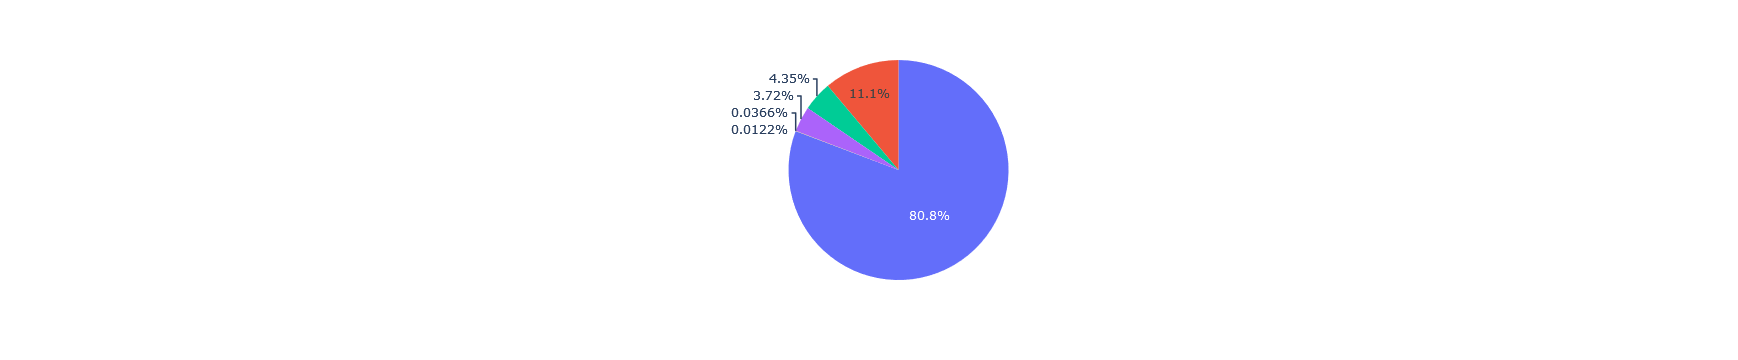

In [73]:
fig = px.pie(labels=ratings.index, values=ratings.values)
fig.show()

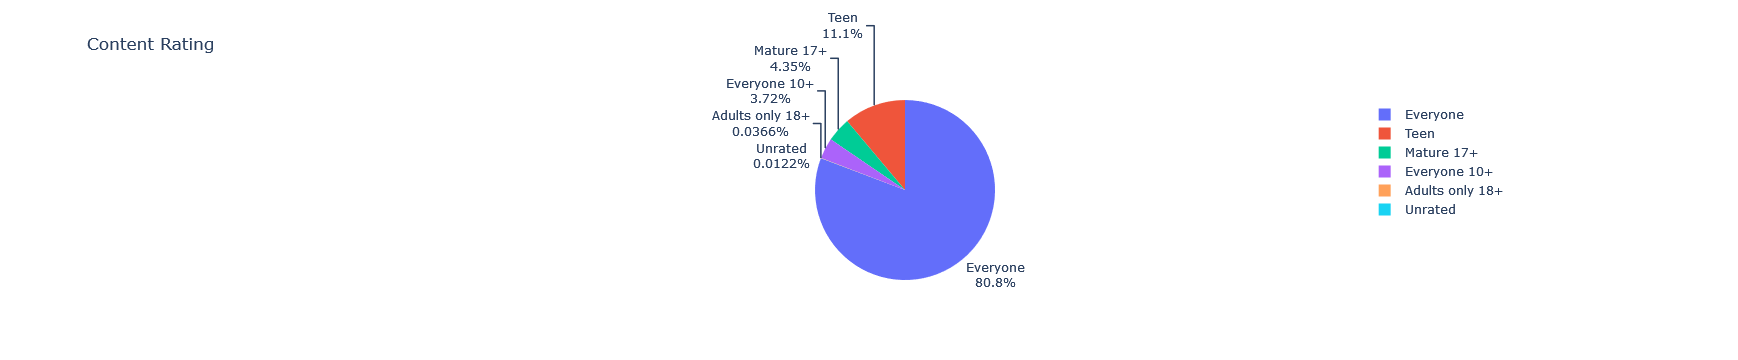

In [74]:
fig = px.pie(
    labels=ratings.index, 
    values=ratings.values,
    title='Content Rating',
    names=ratings.index
)

# In plotly, 'traces' are graphical markers on a figureabs
fig.update_traces(textposition='outside', textinfo='percent+label')

fig.show()

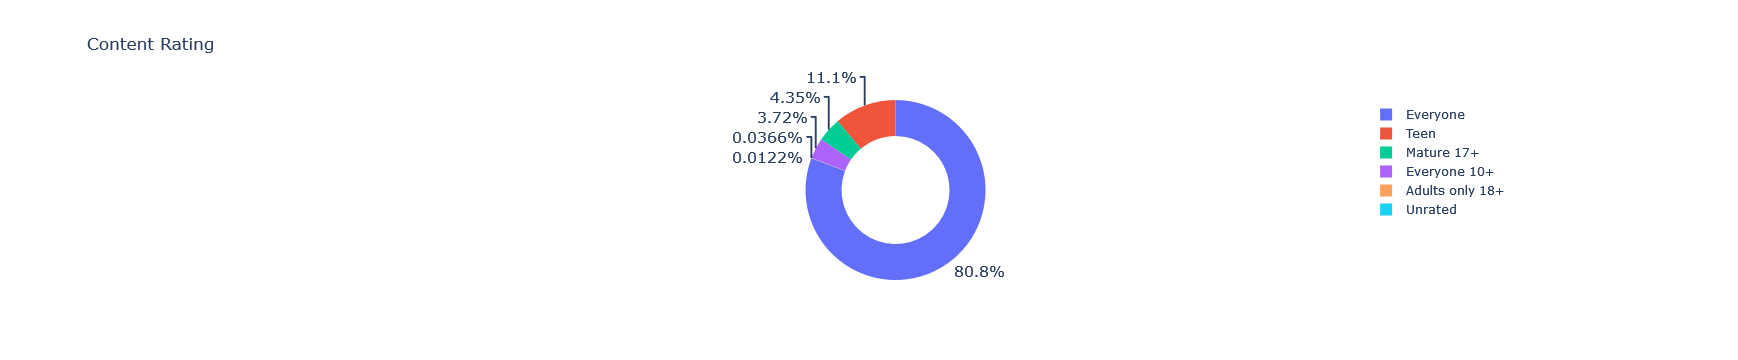

In [75]:
# Donut version
fig = px.pie(
    labels=ratings.index, 
    values=ratings.values,
    title='Content Rating',
    names=ratings.index,
    hole=0.6
)

# In plotly, 'traces' are graphical markers on a figureabs
fig.update_traces(
    textposition='outside', 
    textinfo='percent',
    textfont_size=15
)

fig.show()

# Numeric Type Conversion: Examine the Number of Installs

**Challenge**: How many apps had over 1 billion (that's right - BILLION) installations? How many apps just had a single install? 

Check the datatype of the Installs column.

Count the number of apps at each level of installations. 

Convert the number of installations (the Installs column) to a numeric data type. Hint: this is a 2-step process. You'll have make sure you remove non-numeric characters first. 

In [76]:
df_apps_clean.dtypes['Installs']

dtype('O')

In [77]:
# ddf_apps_clean.groupby('Installs').count()
df_apps_clean.groupby('Installs').agg({'App': pd.Series.count})

,App
Installs,
1,3
"1,000",698
"1,000,000",1417
"1,000,000,000",20
10,69
"10,000",988
"10,000,000",933
100,303
"100,000",1096


In [78]:
df_apps_clean['Installs'] = df_apps_clean['Installs'].str.replace(',','')
df_apps_clean.tail()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10824,Google Drive,PRODUCTIVITY,4.40,2731171,4.00,1000000000,Free,0,Everyone,Productivity
10828,YouTube,VIDEO_PLAYERS,4.30,25655305,4.65,1000000000,Free,0,Teen,Video Players & Editors
10829,Google Play Movies & TV,VIDEO_PLAYERS,3.70,906384,4.65,1000000000,Free,0,Teen,Video Players & Editors
10831,Google News,NEWS_AND_MAGAZINES,3.90,877635,13.00,1000000000,Free,0,Teen,News & Magazines
10835,Subway Surfers,GAME,4.50,27722264,76.00,1000000000,Free,0,Everyone 10+,Arcade


In [79]:
df_apps_clean['Installs'] = pd.to_numeric(df_apps_clean['Installs'])
print(df_apps_clean.dtypes['Installs'])
df_apps_clean.groupby('Installs').agg({'App': pd.Series.count})

int64


,App
Installs,
1,3
5,9
10,69
50,56
100,303
500,199
1000,698
5000,425
10000,988


# Find the Most Expensive Apps, Filter out the Junk, and Calculate a (ballpark) Sales Revenue Estimate

Let's examine the Price column more closely.

**Challenge**: Convert the price column to numeric data. Then investigate the top 20 most expensive apps in the dataset.

Remove all apps that cost more than $250 from the `df_apps_clean` DataFrame.

Add a column called 'Revenue_Estimate' to the DataFrame. This column should hold the price of the app times the number of installs. What are the top 10 highest grossing paid apps according to this estimate? Out of the top 10 highest grossing paid apps, how many are games?


In [80]:
print(df_apps_clean.dtypes['Price'])
df_apps_clean.Price = df_apps_clean.Price.str.replace('$', '')
df_apps_clean.Price = pd.to_numeric(df_apps_clean.Price)
print(df_apps_clean.dtypes['Price'])
df_apps_clean.sort_values('Price', ascending=False)[:20]

object
float64


,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
3946,I'm Rich - Trump Edition,LIFESTYLE,3.60,275,7.30,10000,Paid,400.00,Everyone,Lifestyle
2461,I AM RICH PRO PLUS,FINANCE,4.00,36,41.00,1000,Paid,399.99,Everyone,Finance
4606,I Am Rich Premium,FINANCE,4.10,1867,4.70,50000,Paid,399.99,Everyone,Finance
3145,I am rich(premium),FINANCE,3.50,472,0.94,5000,Paid,399.99,Everyone,Finance
3554,💎 I'm rich,LIFESTYLE,3.80,718,26.00,10000,Paid,399.99,Everyone,Lifestyle
5765,I am rich,LIFESTYLE,3.80,3547,1.80,100000,Paid,399.99,Everyone,Lifestyle
1946,I am rich (Most expensive app),FINANCE,4.10,129,2.70,1000,Paid,399.99,Teen,Finance
2775,I Am Rich Pro,FAMILY,4.40,201,2.70,5000,Paid,399.99,Everyone,Entertainment
3221,I am Rich Plus,FAMILY,4.00,856,8.70,10000,Paid,399.99,Everyone,Entertainment
3114,I am Rich,FINANCE,4.30,180,3.80,5000,Paid,399.99,Everyone,Finance


### The most expensive apps sub $250

In [81]:
# We are removing all of the 'I'm Rich' apps as they were not real apps.
# They were eventually removed from the Play Store.
df_apps_clean = df_apps_clean[df_apps_clean.Price <= 250]

### Highest Grossing Paid Apps (ballpark estimate)

In [82]:
revenue_estimate = df_apps_clean.Price.mul(df_apps_clean.Installs)
df_apps_clean.insert(8, "Revenue_Estimate", revenue_estimate)
df_apps_clean.sort_values('Revenue_Estimate', ascending=False)[:10]

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Revenue_Estimate,Content_Rating,Genres
9220,Minecraft,FAMILY,4.50,2376564,19.00,10000000,Paid,6.99,"69,900,000.00",Everyone 10+,Arcade;Action & Adventure
8825,Hitman Sniper,GAME,4.60,408292,29.00,10000000,Paid,0.99,"9,900,000.00",Mature 17+,Action
7151,Grand Theft Auto: San Andreas,GAME,4.40,348962,26.00,1000000,Paid,6.99,"6,990,000.00",Mature 17+,Action
7477,Facetune - For Free,PHOTOGRAPHY,4.40,49553,48.00,1000000,Paid,5.99,"5,990,000.00",Everyone,Photography
7977,Sleep as Android Unlock,LIFESTYLE,4.50,23966,0.85,1000000,Paid,5.99,"5,990,000.00",Everyone,Lifestyle
6594,DraStic DS Emulator,GAME,4.60,87766,12.00,1000000,Paid,4.99,"4,990,000.00",Everyone,Action
6082,Weather Live,WEATHER,4.50,76593,4.75,500000,Paid,5.99,"2,995,000.00",Everyone,Weather
7954,Bloons TD 5,FAMILY,4.60,190086,94.00,1000000,Paid,2.99,"2,990,000.00",Everyone,Strategy
7633,Five Nights at Freddy's,GAME,4.60,100805,50.00,1000000,Paid,2.99,"2,990,000.00",Teen,Action
6746,Card Wars - Adventure Time,FAMILY,4.30,129603,23.00,1000000,Paid,2.99,"2,990,000.00",Everyone 10+,Card;Action & Adventure


# Plotly Bar Charts & Scatter Plots: Analysing App Categories

In [83]:
# Number of Categories
df_apps_clean.Category.nunique()

33

In [84]:
top_10_categories = df_apps_clean.Category.value_counts()[:10]
top_10_categories

Category
FAMILY             1606
GAME                910
TOOLS               719
PRODUCTIVITY        301
PERSONALIZATION     298
LIFESTYLE           297
FINANCE             296
MEDICAL             292
PHOTOGRAPHY         263
BUSINESS            262
Name: count, dtype: int64

### Vertical Bar Chart - Highest Competition (Number of Apps)

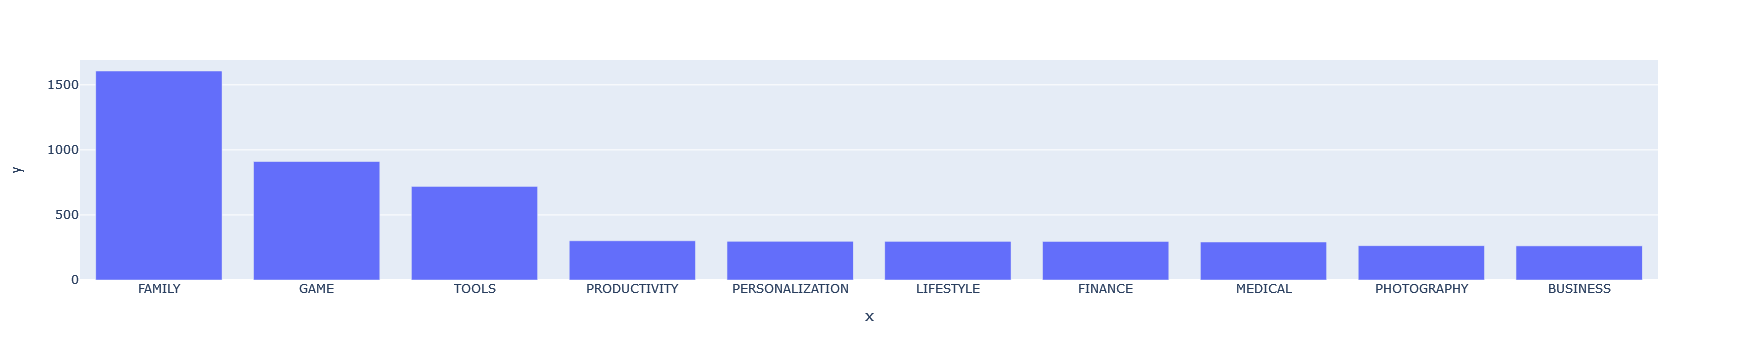

In [85]:
# Family and Game apps appear to be the most competitive categories.
bar = px.bar(x=top_10_categories.index, y=top_10_categories.values)
bar.show()

### Horizontal Bar Chart - Most Popular Categories (Highest Downloads)

In [86]:
category_installs = df_apps_clean.groupby('Category').agg({'Installs':pd.Series.sum})
category_installs.sort_values('Installs', inplace=True)

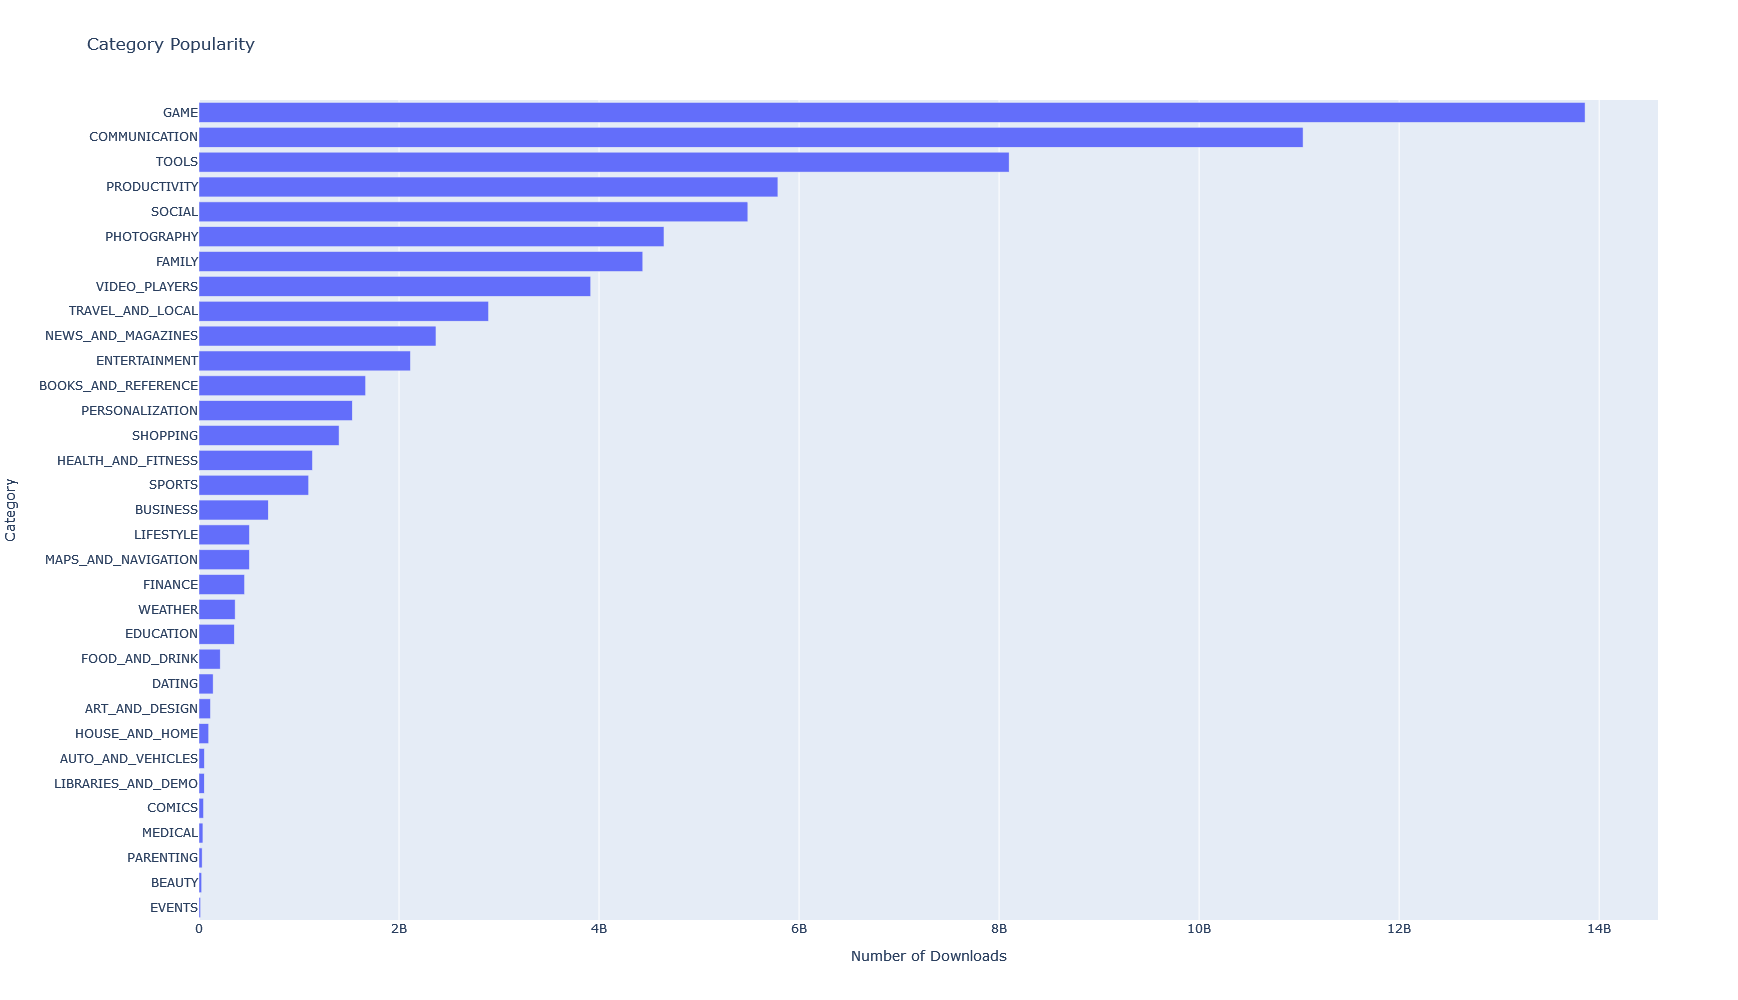

In [87]:
h_bar = px.bar(
    x=category_installs.Installs,
    y=category_installs.index,
    orientation='h',
    title='Category Popularity',
    height=1000
)

h_bar.update_layout(xaxis_title='Number of Downloads', yaxis_title='Category')

h_bar.show()

### Category Concentration - Downloads vs. Competition

**Challenge**: 
* First, create a DataFrame that has the number of apps in one column and the number of installs in another:

<img src=https://imgur.com/uQRSlXi.png width="350">

* Then use the [plotly express examples from the documentation](https://plotly.com/python/line-and-scatter/) alongside the [.scatter() API reference](https://plotly.com/python-api-reference/generated/plotly.express.scatter.html)to create scatter plot that looks like this. 

<img src=https://imgur.com/cHsqh6a.png>

*Hint*: Use the size, hover_name and color parameters in .scatter(). To scale the yaxis, call .update_layout() and specify that the yaxis should be on a log-scale like so: yaxis=dict(type='log') 

In [88]:
apps_by_category = df_apps_clean.groupby('Category').agg({'App':pd.Series.count, 'Installs': pd.Series.sum})
print(apps_by_category.shape)
apps_by_category.sort_values('Installs', ascending=False, inplace=True)
apps_by_category.head()

(33, 2)


,App,Installs
Category,,
GAME,910,13858762717
COMMUNICATION,257,11039241530
TOOLS,719,8099724500
PRODUCTIVITY,301,5788070180
SOCIAL,203,5487841475


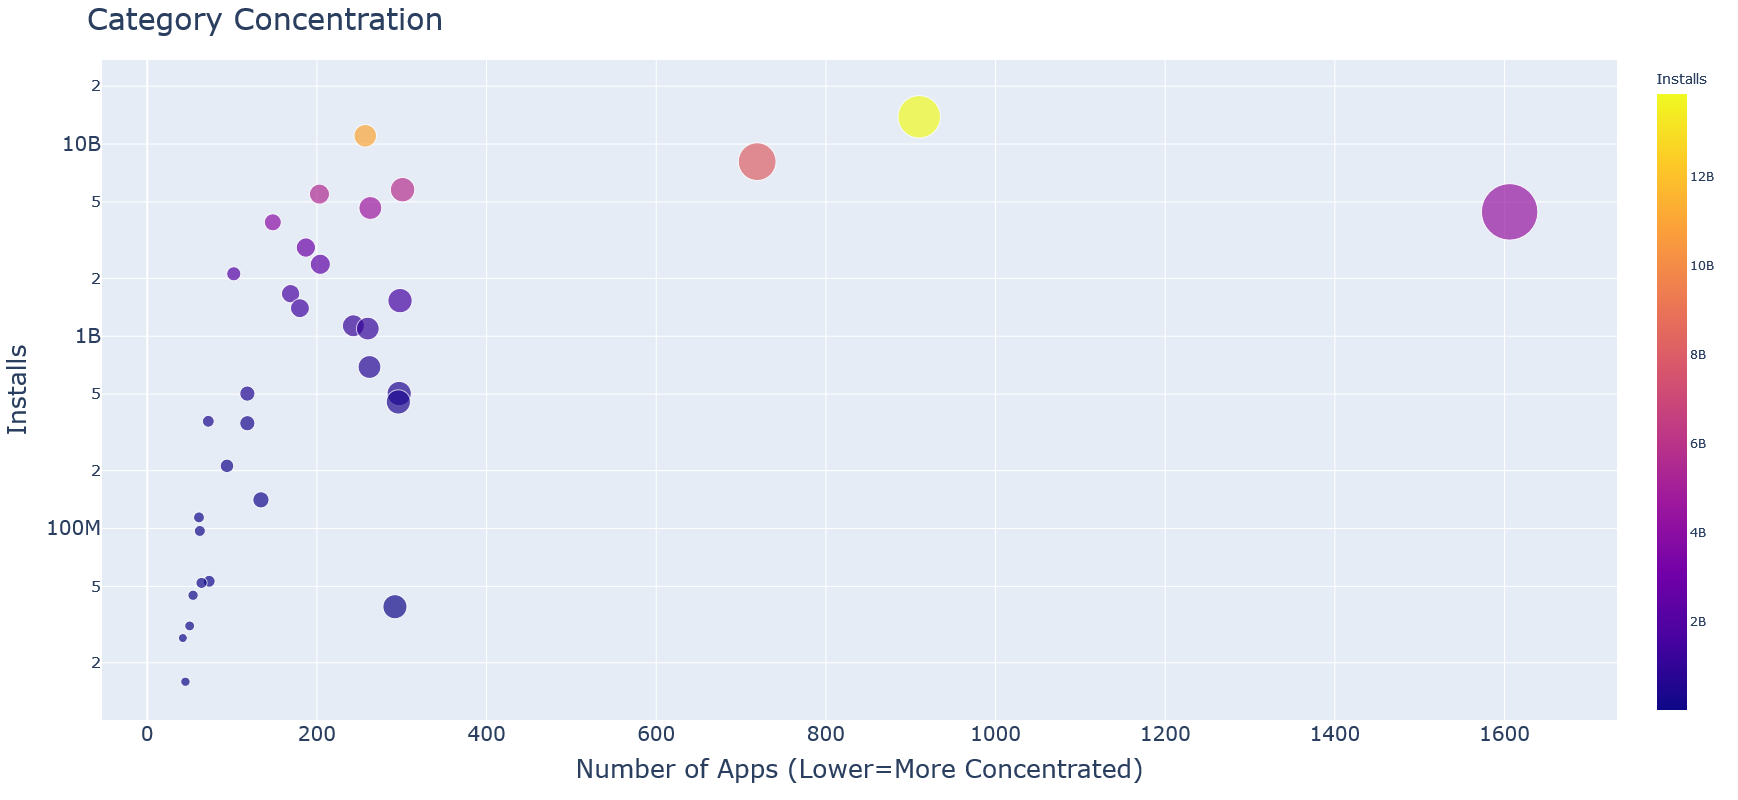

In [89]:
scatter = px.scatter(
    apps_by_category,
    x='App',
    y='Installs',
    color='Installs',
    size="App",
    size_max=40,  # size of the markers
    hover_name=apps_by_category.index,
    height=800
)
scatter.update_layout(
    title=dict(
        text='Category Concentration',
        font=dict(size=30)
    ),
    xaxis=dict(
        title=dict(
            text='Number of Apps (Lower=More Concentrated)',
            font=dict(size=25)
        ),
        tickfont=dict(size=20)
    ),
    yaxis=dict(
        type='log',
        title=dict(
            font=dict(size=25)
        ),
        tickfont=dict(size=20)
    )
)
scatter.show()

# Extracting Nested Data from a Column

**Challenge**: How many different types of genres are there? Can an app belong to more than one genre? Check what happens when you use .value_counts() on a column with nested values? See if you can work around this problem by using the .split() function and the DataFrame's [.stack() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.stack.html). 


In [90]:
# Apps can belong to more than one genre and are separated by a colon.
print(df_apps_clean.Genres.value_counts().sort_values()[:5])
separated_genres = df_apps_clean.Genres.str.split(';', expand=True)  # expand creates a new column for separated values
print(separated_genres[separated_genres[1].notnull()].sample(n=5))

stack = separated_genres.stack()

# Could have done this with one line: stack = df_apps_clean.Genres.str.split(';', expand=True).stack()
num_genres = stack.value_counts()
print('\n')
print(f'There are {len(num_genres)} genres')

Genres
Lifestyle;Pretend Play      1
Strategy;Education          1
Adventure;Education         1
Role Playing;Brain Games    1
Tools;Education             1
Name: count, dtype: int64
                   0                   1
8217       Education         Brain Games
10372      Education           Education
7762     Educational           Education
10003         Arcade  Action & Adventure
7583   Entertainment       Music & Video


There are 53 genres


# Colour Scales in Plotly Charts - Competition in Genres

**Challenge**: Can you create this chart with the Series containing the genre data? 

<img src=https://imgur.com/DbcoQli.png width=400>

Try experimenting with the built in colour scales in Plotly. You can find a full list [here](https://plotly.com/python/builtin-colorscales/). 

* Find a way to set the colour scale using the color_continuous_scale parameter. 
* Find a way to make the color axis disappear by using coloraxis_showscale. 

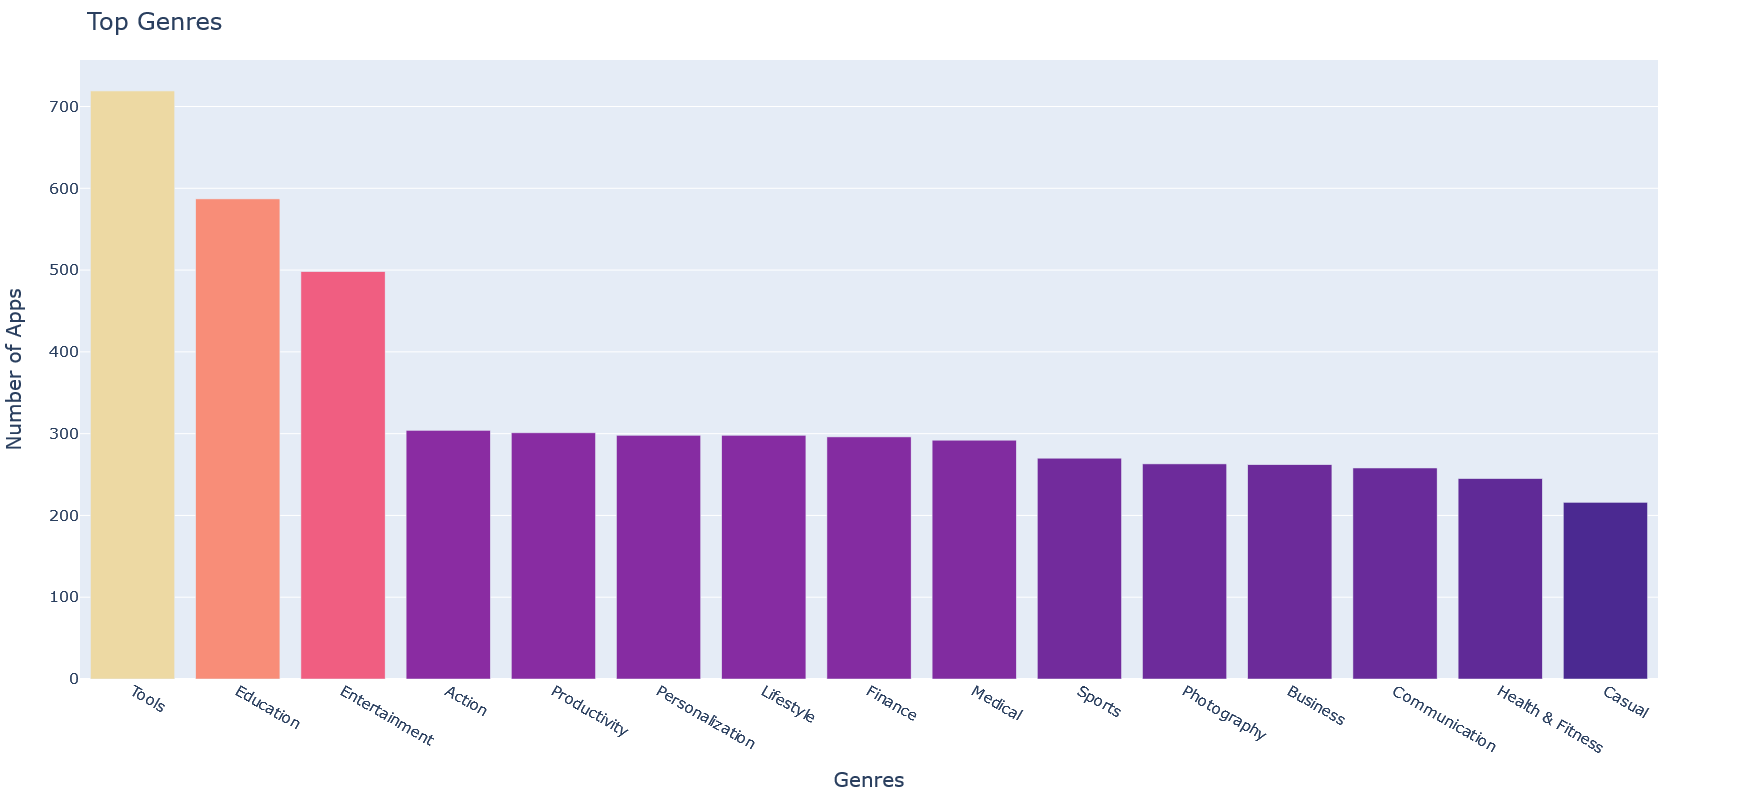

In [100]:
bar = px.bar(
    x=num_genres.index[:15], 
    y=num_genres.values[:15],
    hover_name=num_genres.index[:15],
    color=num_genres.values[:15],
    color_continuous_scale='Agsunset',
    height=800
)
bar.update_layout(
    coloraxis_showscale=False,
    title=dict(
        text='Top Genres',
        font=dict(size=24)
    ),
    xaxis=dict(
        title=dict(
            text='Genres',
            font=dict(size=20)
        ),
        tickfont=dict(size=15)
    ),
    yaxis=dict(
        title=dict(
            text='Number of Apps',
            font=dict(size=20)
        ),
        tickfont=dict(size=15)
    )
)
bar.show()

# Grouped Bar Charts: Free vs. Paid Apps per Category

In [105]:
print(df_apps_clean.Type.value_counts())
df_free_vs_paid = df_apps_clean.groupby(['Category', 'Type'], as_index=False).agg({'App': pd.Series.count})
print(df_free_vs_paid.shape)
df_free_vs_paid.head()

Type
Free    7595
Paid     589
Name: count, dtype: int64
(61, 3)


,Category,Type,App
0,ART_AND_DESIGN,Free,58
1,ART_AND_DESIGN,Paid,3
2,AUTO_AND_VEHICLES,Free,72
3,AUTO_AND_VEHICLES,Paid,1
4,BEAUTY,Free,42


**Challenge**: Use the plotly express bar [chart examples](https://plotly.com/python/bar-charts/#bar-chart-with-sorted-or-ordered-categories) and the [.bar() API reference](https://plotly.com/python-api-reference/generated/plotly.express.bar.html#plotly.express.bar) to create this bar chart: 

<img src=https://imgur.com/LE0XCxA.png>

You'll want to use the `df_free_vs_paid` DataFrame that you created above that has the total number of free and paid apps per category. 

See if you can figure out how to get the look above by changing the `categoryorder` to 'total descending' as outlined in the documentation here [here](https://plotly.com/python/categorical-axes/#automatically-sorting-categories-by-name-or-total-value). 

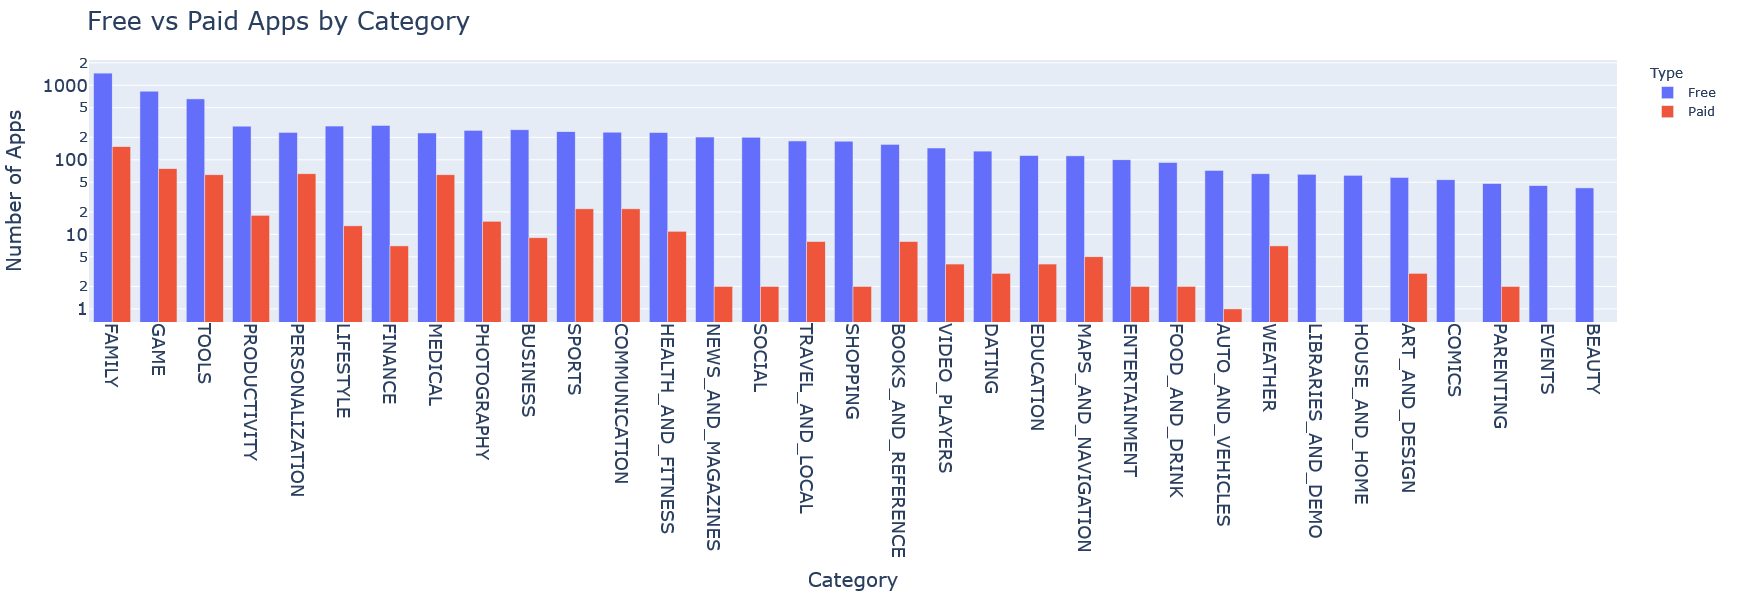

In [133]:
g_bar = px.bar(
    df_free_vs_paid,
    x='Category',
    y='App',
    #title='Free vs Paid Apps by Category',
    color='Type',
    barmode='group',
    height=600
)

g_bar.update_layout(
    title=dict(
        text='Free vs Paid Apps by Category',
        font=dict(size=25)
    ),
    xaxis=dict(
        title=dict(
            text='Category',
            font=dict(size=20)
        ),
        tickfont=dict(size=18),
        tickangle=90,
        categoryorder='total descending'
    ),
    yaxis=dict(
        title=dict(
            text='Number of Apps',
            font=dict(size=20)
        ),
        tickfont=dict(size=18),
        type='log'
    )
)

# Plotly Box Plots: Lost Downloads for Paid Apps

**Challenge**: Create a box plot that shows the number of Installs for free versus paid apps. How does the median number of installations compare? Is the difference large or small?

Use the [Box Plots Guide](https://plotly.com/python/box-plots/) and the [.box API reference](https://plotly.com/python-api-reference/generated/plotly.express.box.html) to create the following chart. 

<img src=https://imgur.com/uVsECT3.png>


# Plotly Box Plots: Revenue by App Category

**Challenge**: See if you can generate the chart below: 

<img src=https://imgur.com/v4CiNqX.png>

Looking at the hover text, how much does the median app earn in the Tools category? If developing an Android app costs $30,000 or thereabouts, does the average photography app recoup its development costs?

Hint: I've used 'min ascending' to sort the categories. 

# How Much Can You Charge? Examine Paid App Pricing Strategies by Category

**Challenge**: What is the median price price for a paid app? Then compare pricing by category by creating another box plot. But this time examine the prices (instead of the revenue estimates) of the paid apps. I recommend using `{categoryorder':'max descending'}` to sort the categories.